<a href="https://colab.research.google.com/github/KFurudate/gene_simulation/blob/main/20201011_gene_simulation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thanks for:

http://www.biology.kyushu-u.ac.jp/~kteshima/Information/20170802_simulation_with_random_number.html

目標：遺伝的浮動の影響をシミュレートして、結果を図示する

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

import time

### 遺伝子頻度の確率的変動

ゲノム上のある一箇所の遺伝子座に祖先型と変異型の２タイプがのどちらかしか存在しない場合を想定する（1-locus 2-allele model）。

二倍体生物の集団の大きさを N として、集団全体では 2N のゲノムが存在する状態を考える。いま集団に存在する 2N 個のゲノムのうち x 個が変異型だったとする。この割合 p=x2N を遺伝子頻度とよぶ。この割合 p の時間変化をシミュレートする。

祖先型であっても変異型であっても生存や生殖成功率に関して何の影響もない中立モデルを仮定する。この場合、子世代の各個体の持つ遺伝子型は親世代集団からランダムに選ばれたタイプ同士が組みになったものと考えることができる。

＊Wright-Fisher model(遺伝子の頻度に基づいて次世代の遺伝子の組成を決めるモデル)


### 第０世代

いま仮に集団の大きさ（集団中のゲノム数）が100だとする。
二倍体の個体数だと50個体で100ゲノム、半数体の生物だと100個体で100ゲノムに相当する。環境は常に一定であり、集団の大きさは変わらないものとする。第0世代目の生物集団ではすでに祖先型と変異型が混ざっている状態にあると考える。

In [1]:
# 親世代
# 集団の大きさ
size = 100

# 変異型の数
mut = 40

In [3]:
# 親世代の変異型の遺伝子頻度
p = mut/size
print('Gene frequency (0th gen): p =',p)

Gene frequency (0th gen): p = 0.4


### 第1世代

この親世代の遺伝子プールからランダムに選ぶという操作は以下になる。
1.   一様乱数を発生する
2.   一様乱数が変異型の遺伝子頻度よりも小さい時は変異型を選ぶ。大きい時は祖先型を選ぶ


In [12]:
# initialize num of mutant alleles in the next generation
cnt=0         

for i in range(size):
    
    # determine allele type
    if np.random.rand() < p:
        
        # if derived
        cnt+=1

print('1st generation')
print(f"ancestral type: {size - cnt}") 
print(f"derived type: {cnt}")

1st generation
ancestral type: 69
derived type: 31


In [13]:
# ≈の変異型の遺伝子頻度
p = cnt/size
print('Gene frequency (1st gen): p =',p)

Gene frequency (1st gen): p = 0.31


### シミュレーション

In [14]:
def next_gen(mut, size = 100):
    '''
    Calculate the number of derived alleles in the next generation.
    
    Arguments:
      mut: number of derived alleles in the parent population
      size: size of the population
    Returns:
      the number of derived alleles in the child population
    '''
    p = mut / size
    cnt = 0
    for i in range(size):
        if np.random.rand() < p:
            cnt += 1
    return cnt

In [28]:
# initialization
derived = 40
size = 100

# print out the initial number of derived alleles
print(derived)

# for 20 generations
for i in range(20):
    
    derived = next_gen(derived , size)
    
    print(f"{i+1}th gen derived type: {derived}")
    print(f"mutation rate: {derived/size}")

40
1th gen derived type: 39
mutation rate: 0.39
2th gen derived type: 36
mutation rate: 0.36
3th gen derived type: 32
mutation rate: 0.32
4th gen derived type: 26
mutation rate: 0.26
5th gen derived type: 26
mutation rate: 0.26
6th gen derived type: 28
mutation rate: 0.28
7th gen derived type: 31
mutation rate: 0.31
8th gen derived type: 44
mutation rate: 0.44
9th gen derived type: 41
mutation rate: 0.41
10th gen derived type: 49
mutation rate: 0.49
11th gen derived type: 55
mutation rate: 0.55
12th gen derived type: 58
mutation rate: 0.58
13th gen derived type: 62
mutation rate: 0.62
14th gen derived type: 63
mutation rate: 0.63
15th gen derived type: 63
mutation rate: 0.63
16th gen derived type: 58
mutation rate: 0.58
17th gen derived type: 56
mutation rate: 0.56
18th gen derived type: 55
mutation rate: 0.55
19th gen derived type: 60
mutation rate: 0.6
20th gen derived type: 63
mutation rate: 0.63


In [31]:
# initialization
derived = 40
size = 100

# initialize a list
tr = []

# append the initial frequency
tr.append( derived/size )


# 50 generations
for i in range(50):
    
    # make next generation
    derived = next_gen(derived, size)
    
    # append freq
    tr.append(derived/size)
tr

[0.4,
 0.43,
 0.46,
 0.44,
 0.42,
 0.39,
 0.42,
 0.44,
 0.44,
 0.47,
 0.53,
 0.42,
 0.36,
 0.32,
 0.37,
 0.32,
 0.43,
 0.44,
 0.42,
 0.45,
 0.41,
 0.51,
 0.5,
 0.48,
 0.49,
 0.51,
 0.53,
 0.47,
 0.42,
 0.49,
 0.47,
 0.48,
 0.51,
 0.47,
 0.51,
 0.44,
 0.4,
 0.48,
 0.47,
 0.48,
 0.46,
 0.49,
 0.43,
 0.54,
 0.57,
 0.64,
 0.64,
 0.62,
 0.61,
 0.64,
 0.61]

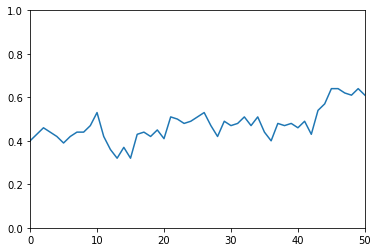

In [32]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

ax.plot(tr)

ax.set_xlim(0,50)
ax.set_ylim(0,1)
plt.show()

In [33]:
# a list of lists
sim = []

# set initial conditions
derived = 40
size = 100

howmany = 1000
generations = 1000

# simulation starts
t_start = time.time()

# repeat simulation 'howmany' times
for j in range(howmany):
    
    # reset initial condition 
    derived = 40
    size = 100
    tr = [derived/size]
    
    # simulate frequency trajectory
    for i in range(generations):
                
        # make next generation
        derived = next_gen(derived, size)
        # append freq
        tr.append( derived/size )
    
    # append trajectory
    sim.append(tr)

# finished
t_end = time.time()
print( '{0:.3f} seconds'.format(t_end - t_start))

31.513 seconds


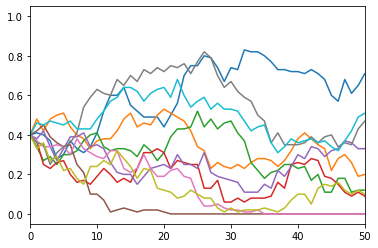

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

for i in range(10):
    ax.plot(sim[i])
ax.set_xlim(0,50)

plt.show()

### 頻度変化、固定確率、固定ならびに消失までの待ち時間の分布

In [47]:
# 固定された場合
fixed = []
# 消失した場合
lost = []

for i in range(len(sim)):
  # シミュレーション結果を抽出
  trajectory = np.array(sim[i])
  # 各頻度変化の最後の頻度を確認(もし消失した場合は頻度は0)
  if trajectory[-1]==0:
    # 消失するまでの世代数をlostに追加
    lost.append(trajectory[trajectory > 0].shape[0])
  else:
    # 固定するまでの世代数をfixedに追加
    fixed.append(trajectory[trajectory < 1].shape[0])
        
p_fix = len(fixed)/len(sim)
ave_fixation_time = np.average(fixed)
ave_time_until_lost = np.average(lost)

print( "the proportion of fixed trajectories is {0:.2f}".format(p_fix))
print( "the average time until fixation of the allele is {0:.2f}".format(ave_fixation_time))
print( "the average time until loss of the allele is {0:.2f}".format(ave_time_until_lost))


the proportion of fixed trajectories is 0.39
the average time until fixation of the allele is 145.95
the average time until loss of the allele is 115.79


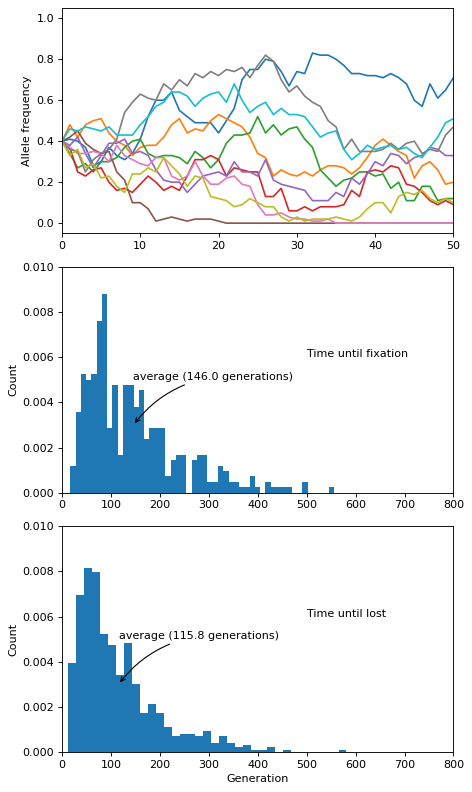

In [49]:
xmax=800
ymax=70

fig = plt.figure(figsize=(6,10),dpi=80)

ax1 = fig.add_subplot(3,1,1)
for i in range(10):
    ax1.plot(sim[i])
ax1.set_xlim(0,50)
ax1.set_ylabel("Allele frequency")


ax2 = fig.add_subplot(3,1,2)
ax2.hist(fixed, bins=50, density=True)
ax2.set_xlim(0, xmax)
ax2.set_ylim(0, .01)
ax2.set_ylabel("Count")
ax2.text(500, .0060, "Time until fixation")
ax2.annotate("average ({0:.1f} generations)".format(ave_fixation_time), 
             xy=(ave_fixation_time, .0030), 
             xytext=(ave_fixation_time, .0050),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))


ax3 = fig.add_subplot(3,1,3)
ax3.hist(lost, bins=50, density=True)
ax3.set_xlim(0, xmax)
ax3.set_ylim(0, 0.01)

ax3.set_xlabel("Generation")
ax3.set_ylabel("Count")
ax3.text(500,.0060, "Time until lost")
ax3.annotate("average ({0:.1f} generations)".format(ave_time_until_lost), 
             xy=(ave_time_until_lost, .0030), 
             xytext=(ave_time_until_lost, .0050),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))



fig.tight_layout()
#fig.savefig("Drift_simulation_1.eps")
plt.show()

0.100 seconds


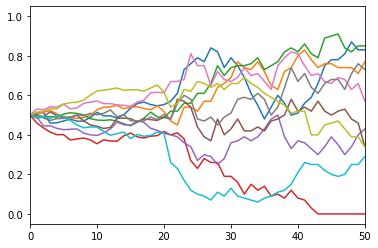

In [52]:
# 集団サイズが減少する場合
# a list of lists
sim = []

# set initial conditions
size_ans = 1000
derived_ans = size_ans*.5


howmany = 10
generations = 100

# simulation starts
t_start = time.time()

# repeat simulation 'howmany' times
for j in range(howmany):
    
    # reset initial condition 
    derived = derived_ans
    size = size_ans

    tr = [derived/size]
    
    # simulate frequency trajectory
    for i in range(generations):
        
        # population size change
        if i==20:
            # reduction
            size = int(size/10)
            derived = int(derived/10)
            
            # growth
            #size *= 10
            #derived *= 10
        
        # make next generation
        derived = next_gen(derived, size)
        # append freq
        tr.append( derived/size )
    
    # append trajectory
    sim.append(tr)

# finished
t_end = time.time()
print( '{0:.3f} seconds'.format(t_end-t_start))


# plot
fig=plt.figure()
ax=fig.add_subplot(111)
for i in range(10):
    ax.plot(sim[i])
ax.set_xlim(0,50)
plt.show()


0.279 seconds


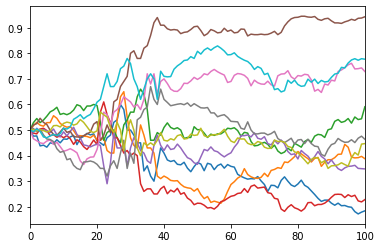

In [55]:
"""
ボトルネック効果: 
生物集団の個体数が激減することにより遺伝的浮動が促進され、さらにその子孫が再び繁殖することにより、
遺伝子頻度が元とは異なるが均一性の高い（遺伝的多様性の低い）集団ができること。

"""
# a list of lists
sim = []

# set initial conditions
size_ans = 1000
derived_ans = size_ans*.5

howmany = 10
generations = 100

# simulation starts
t_start = time.time()

# repeat simulation 'howmany' times
for j in range(howmany):
    
    # reset initial condition 
    derived = derived_ans
    size = size_ans
    tr = [derived/size]
    
    # simulate frequency trajectory
    for i in range(generations):
        
        # population size change
        if i==20:
            # reduction
            size = int(size/10)
            derived = int(derived/10)
            
        if i==40:
            # growth
            size *= 10
            derived *= 10
        
        # make next generation
        derived = next_gen(derived, size)
        # append freq
        tr.append( derived/size )
    
    # append trajectory
    sim.append(tr)

# finished
t_end = time.time()
print( '{0:.3f} seconds'.format(t_end-t_start))


# plot
fig=plt.figure()
ax=fig.add_subplot(111)
for i in range(10):
    ax.plot(sim[i])
ax.set_xlim(0,100)
plt.show()